In [1]:
import numpy as np
import h5py as h5py
import sympy as sy
import matplotlib.pyplot as plt
import simtk.openmm as mm
import simtk.unit as unit
import simtk.openmm.app as app
from tqdm import tqdm

In [18]:
plt.rcParams['figure.figsize'] = 8, 8

# Elliptical Gaussian Kernel 1D

In [76]:
def elliptical_gaussian_kernel_1D(x,xo,A=-1.0,cxx=0.0):
    inc_x = x-xo
    B = cxx*inc_x*inc_x
    return A*np.exp(-B)

In [77]:
xo  = 0.0
cxx = 1.0

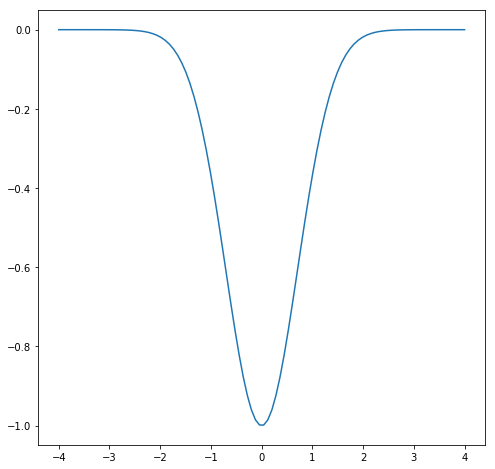

In [79]:
xlim = [-4,4]
xbins = 100

x = np.linspace(xlim[0], xlim[1], xbins)

y = elliptical_gaussian_kernel_1D(x,xo,A,cxx)

plt.plot(x,y)

plt.show()

In [80]:
x = sy.symbols('x')
f = A*sy.exp(-(cxx*(x-xo)**2))
gradient = sy.diff(f,x)
hessian  = sy.diff(gradient,x)

In [81]:
M = hessian.subs(x,xo)

In [82]:
M

2.00000000000000

# Elliptical Gaussian Kernel 2D

In [48]:
def elliptical_gaussian_kernel_2D(x,y,xo,yo,A=-1.0,cxx=0.0,cxy=0.0,cyy=0.0):
    inc_x = x-xo
    inc_y = y-yo
    B = cxx*inc_x*inc_x + 2*cxy*inc_x*inc_y + cyy*inc_y*inc_y
    return A*np.exp(-B)

In [49]:
xo, yo = [0.0,0.0]
A   = -1.0
cxx = 1.0
cxy = 0.0
cyy = 1.0

In [50]:
# Debe ser positiva
M = np.array([[cxx, cxy],[cxy, cyy]])
np.all(np.linalg.eigvals(M+M.transpose()) > 0)

True

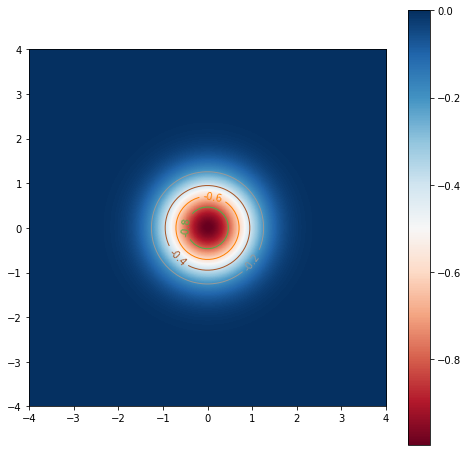

In [52]:
xlim = [-4,4]
ylim = [-4,4]
xbins = 100
ybins = 100

x = np.linspace(xlim[0], xlim[1], xbins)
y = np.linspace(ylim[0], ylim[1], ybins)

X,Y = np.meshgrid(x, y)
Z = elliptical_gaussian_kernel_2D(X,Y,xo,yo,A,cxx,cxy,cyy)

extent = [xlim[0], xlim[1], ylim[0], ylim[1]]
im = plt.imshow(Z, extent=extent, origin='lower',
                cmap=plt.cm.RdBu, interpolation='gaussian')

cset = plt.contour(Z, np.arange(A,0,0.2), extent=extent, origin='lower',
                   linewidths=1, cmap=plt.cm.Set1)

plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
plt.colorbar(im, alpha=0.5)

plt.show()

In [66]:
x = sy.symbols('x')
y = sy.symbols('y')
f = A*sy.exp(-(cxx*(x-xo)**2 + 2*cxy*(x-xo)*(y-yo) + cyy*(y-yo)*(y-yo)))
gradient = sy.derive_by_array(f,(x,y))
hessian = sy.derive_by_array(gradient,(x,y))

In [75]:
M = hessian.subs(x,xo).subs(y,yo)

[2.0*x*exp(-1.0*x**2 - 1.0*y**2), 2.0*y*exp(-1.0*x**2 - 1.0*y**2)]